# Final Project Machine Learning Course


## Movie Genre Classification
Dataset link: [Genre Classification Dataset - IMDb](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data)





### We are tasked to classify genre to movie base on the description.






### Load dataset
# todo: need to explien the data here



In [3]:
import pandas as pd

In [4]:
#read the data using pandas

train_path = 'Genre Classification Dataset/train_data.txt'
train_data = pd.read_csv(train_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

test_path = 'Genre Classification Dataset/test_data.txt'
test_data = pd.read_csv(test_path, delimiter=':::', engine='python', names=['ID', 'Title', 'Description'])

test_sol_path = 'Genre Classification Dataset/test_data_solution.txt'
test_sol_data = pd.read_csv(test_sol_path, delimiter=':::', engine='python',names=['ID', 'Title', 'Genre', 'Description'])

In [5]:
# view the data

print(train_data.shape)
train_data.head(n=10)

# print(test_data.shape)
# test_data.head(n=10)


(54214, 4)


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


### Data Cleaning and Preprocessing
We will clean and preprocess the data
- Remove duplicates and NaN values.
- Preprocess the text data (description) for better model performance (e.g., tokenization, removing stopwords, stemming/lemmatization).

In [6]:
import pandas as pd
import nltk
from nltk import LancasterStemmer
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97252\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
## Check for Duplicates and Remove them
num = train_data.duplicated().sum()
print(num)
if num > 0:
    train_data.drop_duplicates(inplace=True)

0


In [8]:
## Check for nan values
num = train_data.isna().sum()
print(num)
train_data.dropna(inplace=True)

ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [9]:
# Preprocessing

#Get the list of English stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

#exmple for LancasterStemmer
# words = ['sincerely','electricity','roughly','ringing']
# Lanc = LancasterStemmer()
# for w in words:
#     print(w, " : ", Lanc.stem(w))


Lanc = LancasterStemmer()


#Todo: look for more to clean
def clean_text(text):
    """
    Function to clean and preprocess text data.

    Args:
    - text (str): Input text

    Returns:
    - str: Processed text
    """
    text = text.lower()  # Lowercase all characters

    # Tokenize the text into individual words
    words = text.split()

      # Remove stopwords from the tokenized text
    filtered_words = [word for word in words if word not in stop_words]

    # Stemming
    stemmed_words = [Lanc.stem(word) for word in filtered_words]


    # Define the separator for joining words
    word_separator = '  '
     # Join the stemmed words back into a single string
    cleaned_text = word_separator.join(stemmed_words)

    return cleaned_text



train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)
train_data.head()

{'which', "wouldn't", 'about', 'wasn', 'were', "it's", 'is', 'them', 'have', "you'll", 'does', 'once', 'into', 'after', "needn't", "you're", 'should', 'has', 'was', "wasn't", 'ourselves', 's', 'i', 'there', 'shouldn', 'our', 'himself', 'theirs', "isn't", "don't", 'y', 'what', 'ma', "hasn't", 'whom', 'until', 'mustn', "shan't", 'again', "should've", "doesn't", 'his', 'mightn', 'had', 'both', 'that', 'to', "she's", 'in', 't', 'hasn', "weren't", 'him', 'few', 'm', 'now', "won't", 'because', 'her', 'we', 'its', 'why', 'how', 'of', 'those', 've', 'on', "mightn't", 'he', 'then', "hadn't", 'where', 'or', 'just', 'itself', 'a', 'for', 'from', 'herself', 'yourselves', 'too', 'doing', 'won', 'being', 'weren', 'am', "you've", 'at', 'having', 'as', 'this', 'here', "shouldn't", 'before', 'an', 'me', 'your', 'haven', 'so', "that'll", 'if', 'above', 're', 'own', 'these', 'and', 'are', 'through', 'than', "didn't", 'down', 'between', 'it', 'by', 'don', 'themselves', 'yourself', "you'd", 'couldn', 'out'

,ID,Title,Genre,Description,Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"list convers doct parents, 10-year-old os..."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat hist...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"help unemploy fath mak end meet, edi tw..."
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film's titl ref un-recovered body ground ...


###  Data Visualization


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_data["Genre"].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

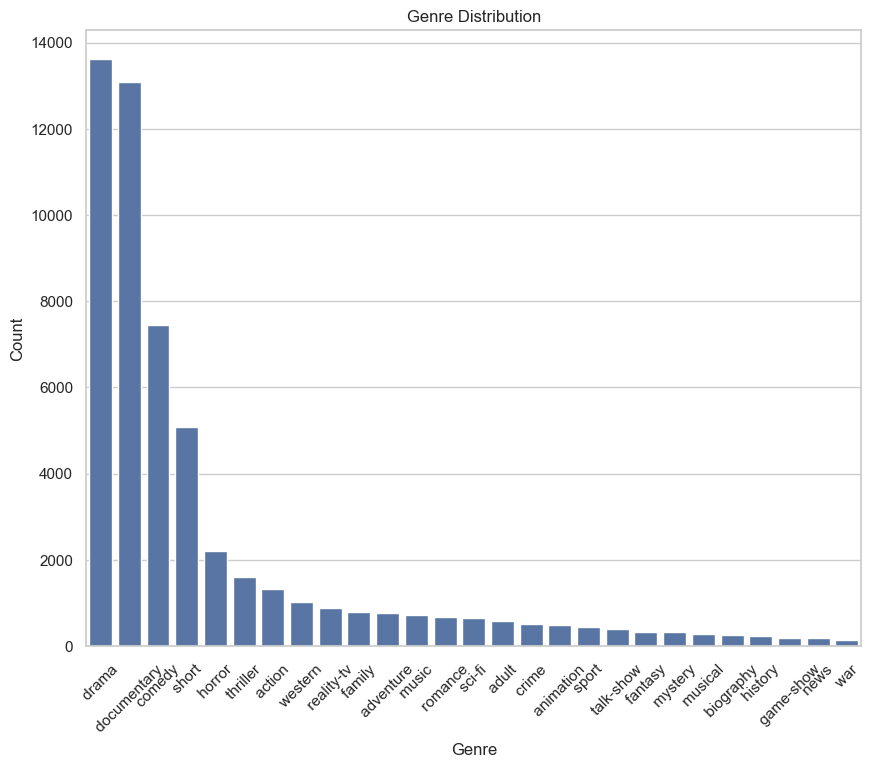

In [12]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting genre distribution horizontally
plt.figure(figsize=(10, 8))
sns.countplot(x='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Text to vectors

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform training data
tfidf_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform test data
tfidf_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])


# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform training data
count_train = count_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform test data
count_test = count_vectorizer.transform(test_data['Text_cleaning'])

## Evaluate the Model


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(tfidf_train, train_data['Genre'])

# Make predictions on the test data
predictions = nb_classifier.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(test_sol_data['Genre'], predictions)
print("Accuracy:", accuracy)

# Get classification report
print("\nClassification Report:")
print(classification_report(test_sol_data['Genre'], predictions))

Accuracy: 0.4373985239852399

Classification Report:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.73      0.03      0.05      7446
       crime        0.00      0.00      0.00       505
 documentary        0.52      0.89      0.66     13096
       drama        0.38      0.87      0.52     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Initialize the Naive Bayes classifier
nb_classifier_count = MultinomialNB()

# Train the classifier
nb_classifier_count.fit(count_train, train_data['Genre'])

# Make predictions on the test data
predictions_count = nb_classifier_count.predict(count_test)

# Evaluate the model
accuracy_count = accuracy_score(test_sol_data['Genre'], predictions_count)
print("Accuracy with CountVectorizer:", accuracy_count)

# Get classification report
print("\nClassification Report with CountVectorizer:")
print(classification_report(test_sol_data['Genre'], predictions_count))




Accuracy with CountVectorizer: 0.5173985239852399

Classification Report with CountVectorizer:


C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.56      0.03      0.06      1314
       adult        0.31      0.01      0.02       590
   adventure        0.57      0.03      0.06       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.46      0.49      7446
       crime        0.00      0.00      0.00       505
 documentary        0.56      0.89      0.68     13096
       drama        0.46      0.81      0.59     13612
      family        1.00      0.00      0.01       783
     fantasy        0.00      0.00      0.00       322
   game-show        1.00      0.10      0.19       193
     history        0.00      0.00      0.00       243
      horror        0.73      0.27      0.39      2204
       music        0.91      0.06      0.11       731
     musical        1.00      0.01      0.03       276
     mystery        0.00      0.00      0.00       318
        n

C:\Users\97252\PycharmProjects\Movie Genre Classification\Script\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print('DecisionTreeClassifier')

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(tfidf_train, train_data['Genre'])

# Make predictions on the test data using Decision Tree
predictions_dt = dt_classifier.predict(tfidf_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(test_sol_data['Genre'], predictions_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

# Get classification report for Decision Tree
print("\nClassification Report (Decision Tree):")
print(classification_report(test_sol_data['Genre'], predictions_dt))

DecisionTreeClassifier


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(tfidf_train, train_data['Genre'])

# Make predictions on the test data using Random Forest
predictions_rf = rf_classifier.predict(tfidf_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(test_sol_data['Genre'], predictions_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)

# Get classification report for Random Forest
print("\nClassification Report (Random Forest):")
print(classification_report(test_sol_data['Genre'], predictions_rf))




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier.fit(tfidf_train, train_data['Genre'])

# Make predictions on the test data using KNN
predictions_knn = knn_classifier.predict(tfidf_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(test_sol_data['Genre'], predictions_knn)
print("\nAccuracy (KNN):", accuracy_knn)

# Get classification report for KNN
print("\nClassification Report (KNN):")
print(classification_report(test_sol_data['Genre'], predictions_knn))


In [ ]:
# from sklearn.linear_model import LogisticRegression
#
#
# # Initialize the Logistic Regression classifier
# lr_classifier = LogisticRegression(multi_class='multinomial',max_iter=100, solver='sag')
#
# # Train the Logistic Regression classifier
# lr_classifier.fit(tfidf_train, train_data['Genre'])
#
# # Make predictions on the test data using Logistic Regression
# predictions_lr = lr_classifier.predict(tfidf_test)
#
# # Evaluate the Logistic Regression model
# accuracy_lr = accuracy_score(test_sol_data['Genre'], predictions_lr)
# print("Accuracy (Logistic Regression):", accuracy_lr)
#
# # Get classification report for Logistic Regression
# print("\nClassification Report (Logistic Regression):")
# print(classification_report(test_sol_data['Genre'], predictions_lr))

In [ ]:
# print('svm')
# # Initialize the SVM classifier
# svm_classifier = SVC(kernel='linear')
#
# # Train the classifier
# svm_classifier.fit(tfidf_train, train_data['Genre'])
#
# # Make predictions on the test data
# predictions = svm_classifier.predict(tfidf_test)
#
# # Evaluate the model
# accuracy = accuracy_score(test_sol_data['Genre'], predictions)
# print("Accuracy:", accuracy)
#
# # Get classification report
# print("\nClassification Report:")
# print(classification_report(test_sol_data['Genre'], predictions))



